In [60]:
# Importing libraries required for handling the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing metrics library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Importing libraries for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Importing library for splitting the data
from sklearn.model_selection import train_test_split

# Importing regression models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Brianc482/731_Group_Project/main/Data/Fifa19.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [5]:
positionClasses = {
    'Goalkeeper': ['GK'],
    'Defender': ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
    'Midfielder': ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 
                   'RCM', 'RM', 'LDM', 'CDM', 'RDM'],
    'Attacker': ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
}

def classifyPos(pos):
    for key in positionClasses:
        if pos in positionClasses[key]:
            return key

df['PositionClass'] = df['Position'].apply(classifyPos)
df[['Name','PositionClass']].head(10)

,Name,PositionClass
0,L. Messi,Attacker
1,Cristiano Ronaldo,Attacker
2,Neymar Jr,Attacker
3,De Gea,Goalkeeper
4,K. De Bruyne,Midfielder
5,E. Hazard,Attacker
6,L. Modrić,Midfielder
7,L. Suárez,Attacker
8,Sergio Ramos,Defender
9,J. Oblak,Goalkeeper


In [6]:
ageBins = [15, 21, 25, 30, 35, 40, 45]
ranges = ['16-21','22-25','26-30','31-35','36-40','41-45']
df['Age_Ranges'] = pd.cut(df['Age'], bins = ageBins, labels = ranges)
df['Age_Ranges'].value_counts()

26-30    5526
22-25    5349
16-21    4750
31-35    2289
36-40     284
41-45       9
Name: Age_Ranges, dtype: int64

In [7]:
def convert(val):
    values = {'K': 1000, 'M': 1000000, '0':1}
    val = val.strip("€")
    if type(val) != float:
        unit = val[-1]
        val = pd.to_numeric(val[:-1]) * values[unit]
    return val.astype('float')

df['Value'] = df['Value'].apply(convert)
df['Wage'] = df['Wage'].apply(convert)


df[['Value', 'Wage']].head()

,Value,Wage
0,110500000.0,565000.0
1,77000000.0,405000.0
2,118500000.0,290000.0
3,72000000.0,260000.0
4,102000000.0,355000.0


In [8]:
maxEarners= df[['Name','Value', 'Wage']].nlargest(11,'Wage', keep = 'first')
maxEarners = maxEarners.set_index('Name')
maxEarners.head()

,Value,Wage
Name,,
L. Messi,110500000.0,565000.0
L. Suárez,80000000.0,455000.0
L. Modrić,67000000.0,420000.0
Cristiano Ronaldo,77000000.0,405000.0
Sergio Ramos,51000000.0,380000.0


Text(0, 0.5, 'Wage')

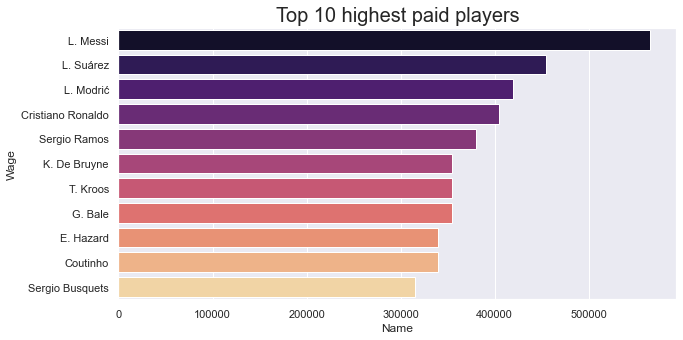

In [9]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = maxEarners['Wage'], y = maxEarners.index,  palette = 'magma')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

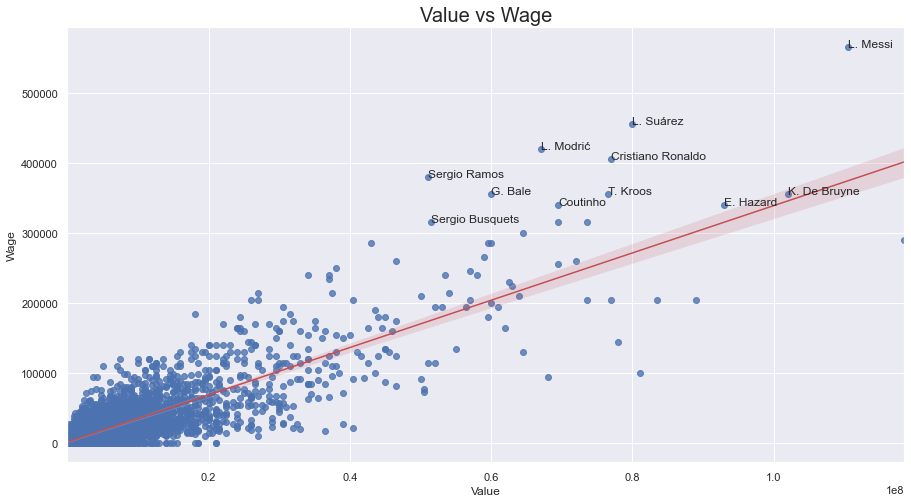

In [10]:
plt.figure(figsize=(15,8))
labels = maxEarners.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data = df,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (maxEarners['Value'][i],maxEarners['Wage'][i]))

In [11]:
def best_positions(p_pos):
    ppos = list(p_pos.split(" "))
    print(ppos)

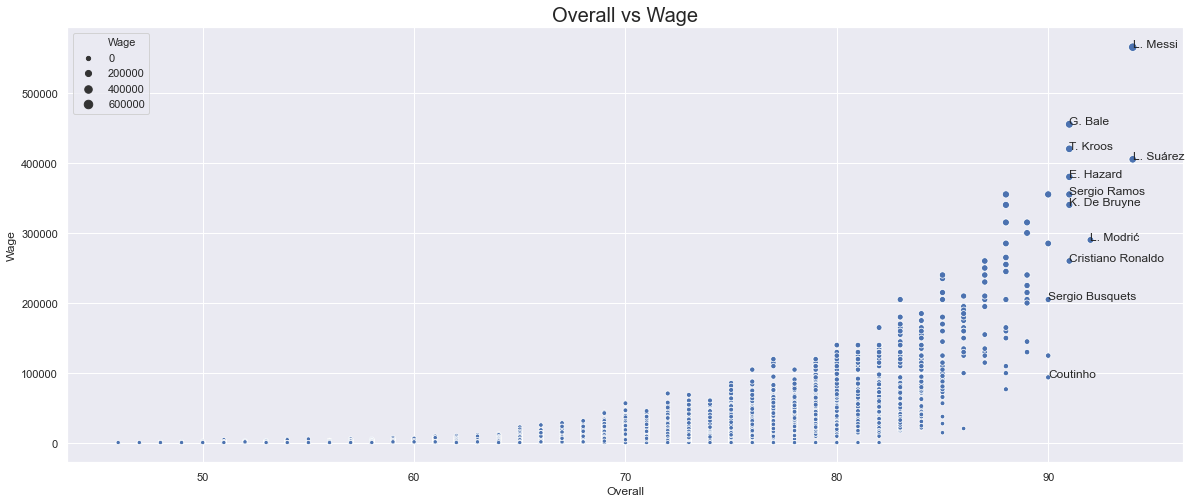

In [12]:
plt.figure(figsize=(20,8))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Overall', y = 'Wage' , data = df, size='Wage')
plt.title('Overall vs Wage', fontsize = 20)

for i, label in enumerate(labels):
    ax.annotate(label, (df['Overall'][i],df['Wage'][i]))

Text(0.5, 1.0, 'Top 5 nations with highest value of players')

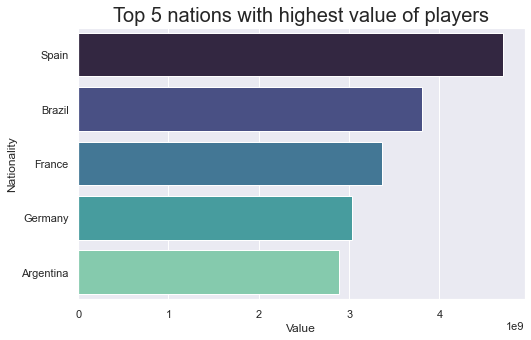

In [13]:
nationalVal = df[['Value']].groupby(df['Nationality']).apply(np.sum)
topVal = nationalVal.nlargest(5,'Value', keep = 'first')
plt.figure(figsize=(8,5))
sns.barplot(x= 'Value', y = topVal.index, data = topVal,  palette = 'mako')
plt.title('Top 5 nations with highest value of players', fontsize = 20)

In [14]:
# df['Nationality'].nunique()
df['Nationality'].value_counts().head(25)

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Korea Republic          335
Portugal                322
Turkey                  303
Austria                 298
Scotland                286
Name: Nationality, dtype: int64

Text(0.5, 1.0, 'Wage vs Position Class')

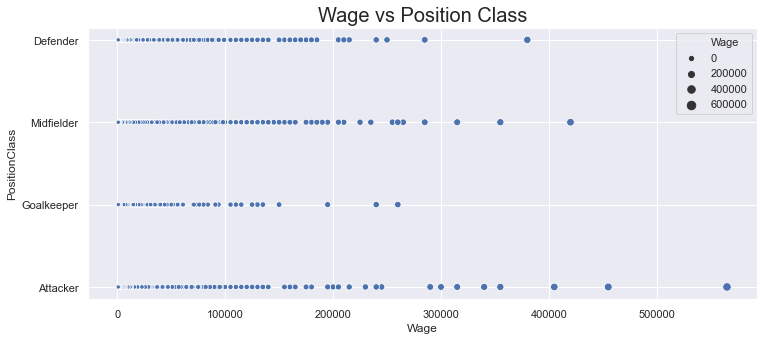

In [15]:
plt.figure(figsize=(12,5))
labels = maxEarners.index
ax = sns.scatterplot(x = 'Wage', y = 'PositionClass' , data = df,size='Wage')
plt.title('Wage vs Position Class', fontsize = 20)

In [16]:
df.drop(["Unnamed: 0","Flag","Club","Photo","Club Logo", "ID"],axis=1,inplace=True)
df = df.replace(np.nan,0)

In [33]:
df_germany = df.loc[df['Nationality']=='Germany']
df_germany.to_csv("Germany.csv", index=False)
df_italy = df.loc[df['Nationality']=='Italy']
df_italy.to_csv("Italy.csv", index=False)
df_spain = df.loc[df['Nationality']=='Spain']
df_spain.to_csv("Spain.csv", index=False)
df_brazil = df.loc[df['Nationality']=='Brazil']
df_brazil.to_csv("Brazil.csv", index=False)
df_argentina = df.loc[df['Nationality']=='Argentina']
df_argentina.to_csv("Argentina.csv", index=False)

In [20]:
cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Skill Moves','Dribbling', 'Curve',
      'FKAccuracy', 'LongPassing', 'BallControl', 'Agility', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
      'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Reactions', 'Aggression',
      'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
      'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(cols):
    print('Best {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmax()][0]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Skill Moves : Cristiano Ronaldo
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Agility : Neymar Jr
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Reactions : Cristiano Ronaldo
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M.

In [21]:
i=0
while i < len(cols):
    print('Worst {0} : {1}'.format(cols[i],df.loc[df[cols[i]].idxmin()][0]))
    i += 1

Worst Crossing : J. McNulty
Worst Finishing : J. McNulty
Worst HeadingAccuracy : J. McNulty
Worst ShortPassing : J. McNulty
Worst Volleys : J. McNulty
Worst Skill Moves : J. McNulty
Worst Dribbling : J. McNulty
Worst Curve : J. McNulty
Worst FKAccuracy : J. McNulty
Worst LongPassing : J. McNulty
Worst BallControl : J. McNulty
Worst Agility : J. McNulty
Worst Acceleration : J. McNulty
Worst SprintSpeed : J. McNulty
Worst Agility : J. McNulty
Worst Reactions : J. McNulty
Worst Balance : J. McNulty
Worst ShotPower : J. McNulty
Worst Jumping : J. McNulty
Worst Stamina : J. McNulty
Worst Strength : J. McNulty
Worst LongShots : J. McNulty
Worst Reactions : J. McNulty
Worst Aggression : J. McNulty
Worst Interceptions : J. McNulty
Worst Positioning : J. McNulty
Worst Vision : J. McNulty
Worst Penalties : J. McNulty
Worst Composure : J. McNulty
Worst Marking : J. McNulty
Worst StandingTackle : J. McNulty
Worst SlidingTackle : J. McNulty
Worst GKDiving : J. McNulty
Worst GKHandling : J. McNulty


In [34]:
target = "Overall"
predictors = list(df.columns)
for r in [target,"Name","Age","Nationality","Position","Weak Foot","Preferred Foot", "Work Rate"]:
  predictors.remove(r)
print(target,predictors)

Overall ['Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Skill Moves', 'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause', 'PositionClass', 'Age_Ranges']


In [35]:
def numColumns(col):
    if type(list(df[col])[0]) == float:
        return col

numberPreds = []

for c in df.columns:
    temp = numColumns(c)
    if temp != None:
        numberPreds.append(temp)

numberPreds

['Value',
 'Wage',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Jersey Number',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [36]:
scaler = StandardScaler()
numberPreds.append(target)
# print(predictors,target)
scaled_df = pd.DataFrame(data=scaler.fit_transform(df_germany[numberPreds]),columns=numberPreds)

numberPreds.remove(target)

X = scaled_df[numberPreds]
y = scaled_df[target]

print(X.shape,y.shape)

(1198, 40) (1198,)


In [37]:
df['Loaned From'].loc[df["Loaned From"].isna() == False]

0        0
1        0
2        0
3        0
4        0
        ..
18202    0
18203    0
18204    0
18205    0
18206    0
Name: Loaned From, Length: 18207, dtype: object

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state= 1)
mlpReg = MLPRegressor(max_iter=130,verbose=1)
mlpReg.fit(X_train.values,y_train.values)

Iteration 1, loss = 0.69775912
Iteration 2, loss = 0.41757018
Iteration 3, loss = 0.29623488
Iteration 4, loss = 0.22488189
Iteration 5, loss = 0.18593084
Iteration 6, loss = 0.15689698
Iteration 7, loss = 0.14039119
Iteration 8, loss = 0.12462494
Iteration 9, loss = 0.10739401
Iteration 10, loss = 0.09923241
Iteration 11, loss = 0.09051305
Iteration 12, loss = 0.08677519
Iteration 13, loss = 0.07788907
Iteration 14, loss = 0.07287704
Iteration 15, loss = 0.06818610
Iteration 16, loss = 0.06501249
Iteration 17, loss = 0.06524313
Iteration 18, loss = 0.06326937
Iteration 19, loss = 0.06674610
Iteration 20, loss = 0.05930412
Iteration 21, loss = 0.05466322
Iteration 22, loss = 0.05678828
Iteration 23, loss = 0.05177295
Iteration 24, loss = 0.04978090
Iteration 25, loss = 0.05033256
Iteration 26, loss = 0.04969827
Iteration 27, loss = 0.05178237
Iteration 28, loss = 0.05734778
Iteration 29, loss = 0.05023240
Iteration 30, loss = 0.05639289
Iteration 31, loss = 0.05001982
Iteration 32, los

MLPRegressor(max_iter=130, verbose=1)

In [54]:
preds = mlpReg.predict(X_test)
score = r2_score(y_test,preds)
print(score)

0.9422783154109219


In [55]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [56]:
preds_lr = lr.predict(X_test)
score_lr = r2_score(y_test,preds_lr)
print(score_lr)

0.853219823295739


In [63]:
random = RandomForestRegressor(n_jobs=-1, n_estimators=100)
random.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [66]:
preds_rf = random.predict(X_test)
#0.0 is best possible score from MAE
print ('Mean-Absolute-Error: {}'.format(mean_absolute_error(y_test,preds_rf)))
#This is the weighted variance in our calculations 1.0 is maximum
print ('R2 score: {}'.format(r2_score(y_test,preds_rf)))

Mean-Absolute-Error: 0.13273910657966867
R2 score: 0.9682029469824447
